# Implementación de Support Vector Machine

En primer lugar vamos a trabajar con el dataset `Social_Network_Ads.csv`, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads)

1. Comenzamos importando las librerías necesarias y cargando el dataset `DS_Encuentro_25_ads.csv`

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [156]:
dataset = pd.read_csv('../datasets/DS_Encuentro_25_ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


2. Para nuestro problema, sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary`. Y como target a la columna `Purchased`

In [157]:
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values

3. Luego, debemos separar los datos de entrenamiento de los datos de testing, mediante la función `train_test_split`

In [158]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

4. Además, vamos a proceder a estandarizar los datos.

In [159]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

5. Vamos a realizar el entrenamiento de nuestra SVM.

In [160]:
from sklearn.svm import SVC

classifier = SVC(C = 1, kernel = 'rbf', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

6. Una vez finalizado el entrenamiento, podemos realizar las predicciones sobre los datos de testing.

In [161]:
Y_Pred = classifier.predict(X_Test)

7. Seguidamente, vamos a visualizar los resultados mediante:
 
* `Matriz de Confusión`
* `Reporte de Clasificación`
* `Gráfico de límites de Decisión`

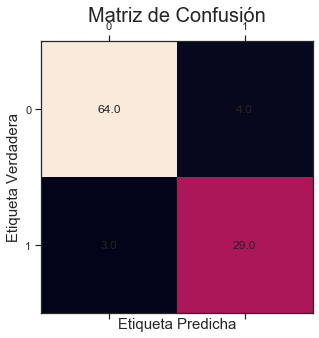

In [162]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [163]:
# Reporte de Clasificación
print(classification_report(Y_Test, Y_Pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



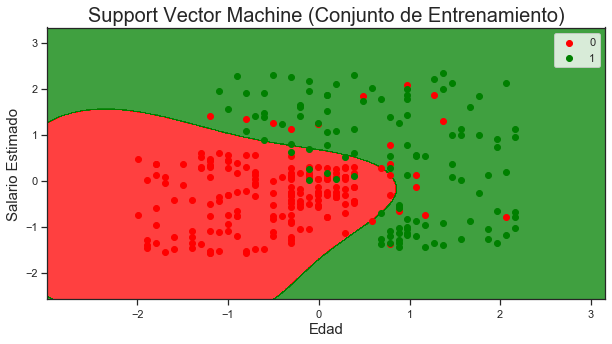

In [164]:
# Visualizando los resultados en el set de entrenamiento
from matplotlib.colors import ListedColormap

X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(10,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Conjunto de Entrenamiento)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

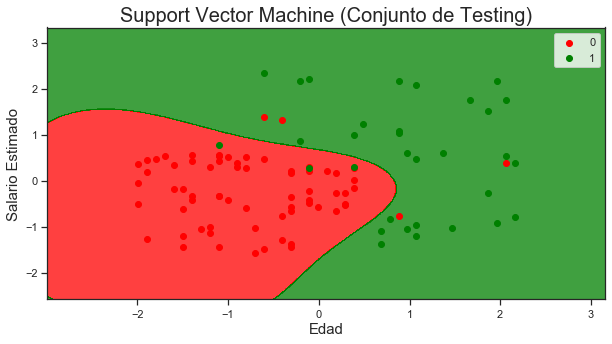

In [165]:
# Visualizando los resultados en el set de testing
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize=(10,5))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Conjunto de Testing)', fontsize=20)
plt.xlabel('Edad', fontsize=15)
plt.ylabel('Salario Estimado', fontsize=15)
plt.legend()
plt.show()

**Ejercicios:** 
1. Modificar el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. Por ejemplo, probar con un kernel tipo `rbf`. ¿Qué hace ese kernel?
2. Modificar el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 

---
# Implementación de Kernel SVM

Utilizando el dataset `DS_Clase_04_iris.csv`, realizar los siguientes ejercicios. Prestar atención a que es un problema Multiclase. ¿Cómo trabaja SVM estos casos?

`Ejercicios:`

1. Implementar un clasificador SVM con Kernel Polinómico.
2. Implementar un clasificador SVM con Kernel Gaussiano.
3. Implementar un clasificador SVM con Kernel Sigmoide.
4. ¿Qué Kernel produce los mejores resultados? ¿Qué explicación podemos dar para los resultados obtenidos con el Kernel Sigmoide?

`Tip:` Utilizando el código visto al comienzo de la notebook, podés crear funciones que te permitan graficar la matriz de confusión y los límites de clasificación, sin tener que copiar y pegar todo el código.

In [166]:
irisdata = pd.read_csv('../datasets/DS_Clase_04_iris.csv')
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


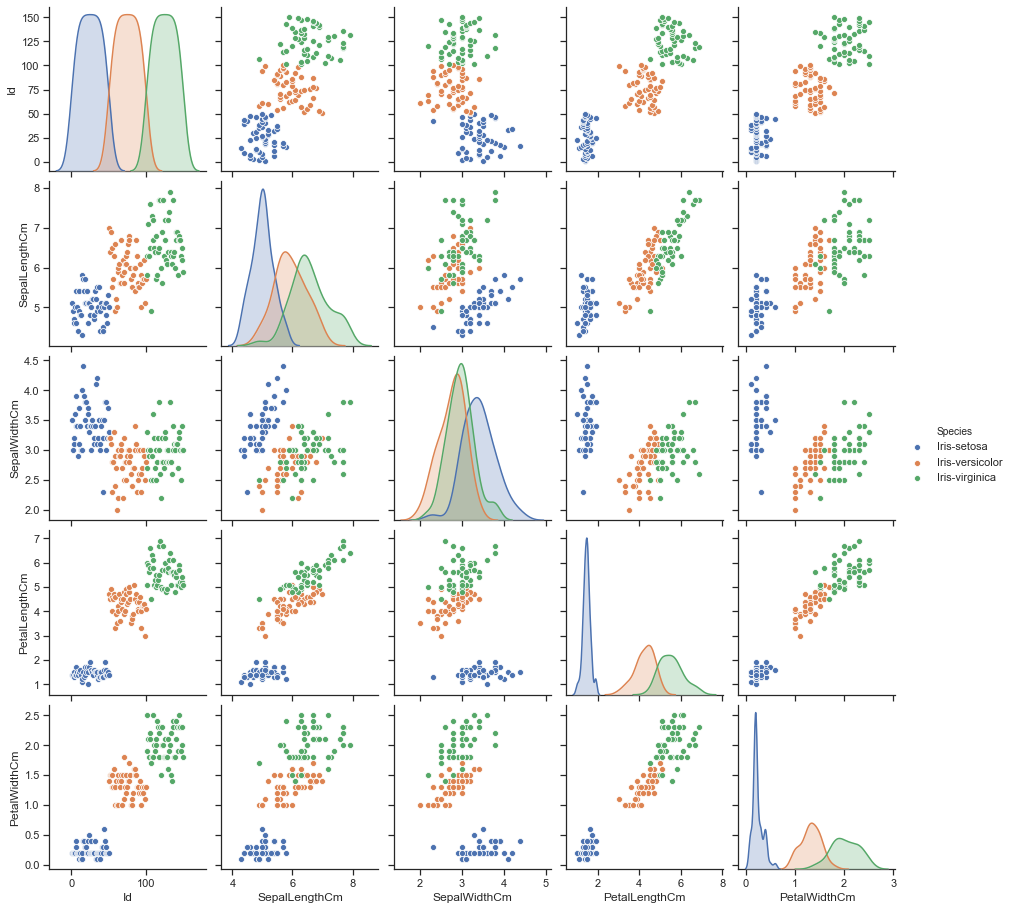

In [167]:
import seaborn as sns
#sns.set()

sns.pairplot(data=irisdata, hue="Species")

In [168]:
X = irisdata.iloc[:, [1,4]].values
Y = irisdata.iloc[:, 5].values

In [169]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### 1. Kernel Polinómico

In [170]:
from sklearn.svm import SVC

classifier = SVC(C = 2, kernel = 'poly', random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [171]:
Y_Pred = classifier.predict(X_Test)

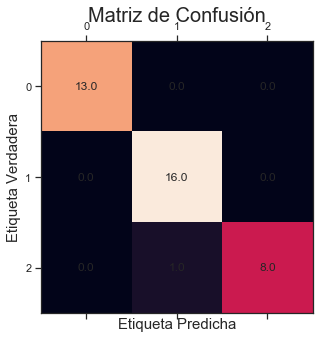

In [172]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [173]:
# Reporte de Clasificación
print(classification_report(Y_Test, Y_Pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38



### 2. Kernel Gaussiano

In [174]:
from sklearn.svm import SVC

classifier = SVC(C = 2, kernel = 'rbf' , random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [175]:
Y_Pred = classifier.predict(X_Test)

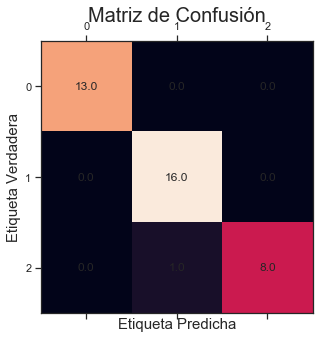

In [176]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [177]:
# Reporte de Clasificación
print(classification_report(Y_Test, Y_Pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38



### 3 Kernel Sigmoide

In [178]:
from sklearn.svm import SVC

classifier = SVC(C = 2, kernel = 'sigmoid' , random_state = 0)
classifier.fit(X_Train, Y_Train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [179]:
Y_Pred = classifier.predict(X_Test)

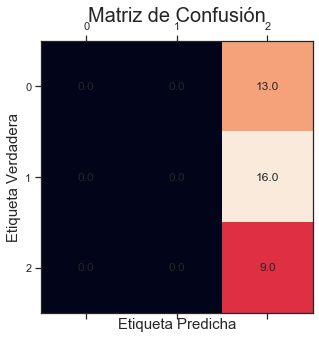

In [180]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_Test, Y_Pred)

fig, ax = plt.subplots(figsize=(10,5))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [181]:
# Reporte de Clasificación
print(classification_report(Y_Test, Y_Pred))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        13
Iris-versicolor       0.00      0.00      0.00        16
 Iris-virginica       0.24      1.00      0.38         9

       accuracy                           0.24        38
      macro avg       0.08      0.33      0.13        38
   weighted avg       0.06      0.24      0.09        38



/Users/danteulisesrangelrobles/miniconda3/envs/datascience/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Conclusiones